# Earth's orbit (Velocity Verlet integrator)

Develop a simulation of the motion of the Earth around the sun.

We will use the *Velocity Verlet* integrator for robust, energy-conserving simulations.

(This notebook is based on notebook [earth_orbit_euler.ipynb](earth_orbit_euler.ipynb). The Euler integrator was replaced with the _velocity Verlet_ algorithm, as derived in the lectures.)

In [47]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

Define constants

In [48]:
m_earth = 3.00346e-6  # in solar masses
M_sun = 1.
G = 4*np.pi**2

v0y = 6.179 # estim: 2*np.pi       # initial velocity AU/yr
r0x = 1.0           # AU

Initial conditions: initial position $\mathbf{r}_0 = \mathbf{r}(t=0)$ and initial velocity $\mathbf{v}_0 = \mathbf{v}(t=0)$.

In [49]:
r0 = np.array([r0x, 0])
v0 = np.array([0, v0y])

Integrate the equations of motions:

In [50]:
dt = 1e-2   # in years (try a coarse time step)
t_max = 10. # year
N_steps = int(t_max / dt)

r = np.zeros(2)  # (x, y)
v = np.zeros(2)  # (vx, vy)
t = 0

def F_gravity(r, m, M):
    rlength = np.sqrt(np.sum(r*r))
    return -G*m*M/rlength**3 * r

# initial conditions
r[:] = r0
v[:] = v0

r_values = [r0]
v_values = [v0]
t_values = [t]

# need to start velocity Verlet with current acceleration
a = F_gravity(r, m_earth, M_sun)/m_earth

for i in range(N_steps):
    t += dt
    
    # velocity Verlet
    v_half = v + 0.5*dt*a        # half-step velocity
    r_new = r + dt*v_half
    a_new = F_gravity(r_new, m_earth, M_sun)/m_earth
    v_new = v_half + 0.5*dt*a_new
    
    r_values.append(r_new)
    v_values.append(v_new)
    t_values.append(t)

    r[:] = r_new
    v[:] = v_new
    a[:] = a_new    # important: use force/acceleration for next step!

# turn lists of results into arrays for easier processing
r_values = np.array(r_values)
v_values = np.array(v_values)
t_values = np.array(t_values)

Plot the orbit $\mathbf{r}(t)$ in the $x$-$y$ plane:

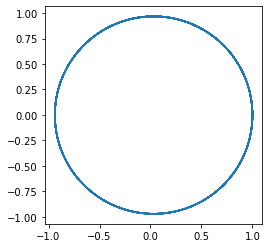

In [51]:
ax = plt.subplot(1,1,1)
ax.plot(r_values[:, 0], r_values[:, 1])
ax.set_aspect(1)

For 10 years that looks as expected, even though we used a coarse time step of $\Delta t = 10^{-2}\,\text{yr}$.

Is the orbit an ellipse?

In [52]:
distance = np.sqrt(np.sum(r_values**2, axis=1))

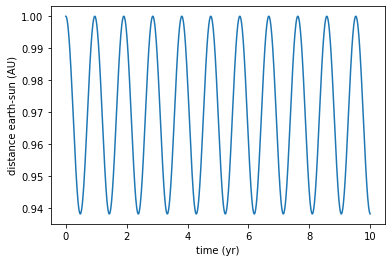

In [53]:
plt.plot(t_values, distance)
plt.ylabel("distance earth-sun (AU)")
plt.xlabel("time (yr)");

In [54]:
distance.min(), distance.max()

(0.9382993544641477, 1.0)

Earth's [orbital eccentricity](https://en.wikipedia.org/wiki/Orbital_eccentricity)
$$
e = \frac{r_a - r_p}{r_a + r_p}
$$


In [57]:
ra = distance.max()
rp = distance.min()

e = (ra - rp)/(ra + rp)
ratio = ra/rp
print(f"eccentricity e = {e:.4f} and ra/rp = {ratio:.3f}")

eccentricity e = 0.0318 and ra/rp = 1.066


This value is somewhat larger than the currently measured value $e=0.0167$ (and $r_a/r_p = 1.034$); the discrepancy comes from our approximate initial conditions.